<a href="https://colab.research.google.com/github/StefTse/AIDL_xrcises/blob/main/AIDL_03_Lab_7_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### University of West Attica
## MSc in Artificial Intelligence & Deep Learning

# AIDL03 - Platforms for AI and Python programming

### G. Nikolaou 
### nikolaou@uniwa.gr

<br>
<br>

# K-Nearest Neigbors Algorithm
##  Iris Dataset

<br>
<br>

### **Importing necessary libraries**

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
%matplotlib inline

<br>

#  Import and Understand your Dataset

<br>

## Data Import and Exploration

#### Importing csv filetype

In [6]:
data=pd.read_csv('/content/Iris_Data.csv')

### Data Exploration

Use Pandas and visualization libraries to explore your dataset. Get insights that will help you during modeling.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
data.isnull().sum() #checking for total null values


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [20]:
data.groupby('species').size()


species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [23]:
data.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
data.groupby(['sepal_length','sepal_width','petal_length', 'petal_width'])['species'].count()

sepal_length  sepal_width  petal_length  petal_width
4.3           3.0          1.1           0.1            1
4.4           2.9          1.4           0.2            1
              3.0          1.3           0.2            1
              3.2          1.3           0.2            1
4.5           2.3          1.3           0.3            1
                                                       ..
7.7           2.6          6.9           2.3            1
              2.8          6.7           2.0            1
              3.0          6.1           2.3            1
              3.8          6.7           2.2            1
7.9           3.8          6.4           2.0            1
Name: species, Length: 147, dtype: int64

Text(0.5, 1.0, 'Species to petal_length')

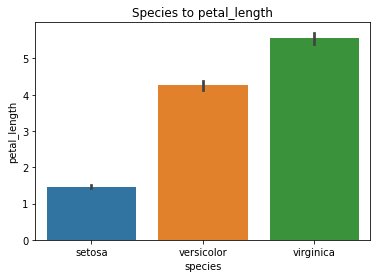

In [30]:
sns.barplot(x = "species",y = "petal_length",data=data) 
plt.title('Species to petal_length')

<br>
<br>

# Splitting data in training and test datasets

Inputs are assigned to variable `Χ` and outputs to `y`

In [31]:
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y= data['species']

Library Scikit-learn has a method named ``train_test_split`` for the purpose of splitting data in training and test subsets

In [40]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=7)

print("X_train size:", X_train.shape)
print("y_train size:", y_train.shape)

print("X_test size:", X_test.shape)
print("y_test size:", y_test.shape)

X_train size: (112, 4)
y_train size: (112,)
X_test size: (38, 4)
y_test size: (38,)


<br>
<br>

# Create a Machine Learning Model

In  **scikit-learn** library, a model (estimator) for classification is a Python object with the following methods
- `fit(X, y)` for model training using input data `Χ` and output `y` (here we use X_train, y_train)
- `predict(y_test)` to use the model for the classification of previously unseen by the model data (y_test) 


Following are the basic steps for the development and use of machine learning models




---
### 1. Import class of models from scikit-learn library 



In [41]:
from sklearn.neighbors import KNeighborsClassifier



---




### 2. Define model (create instance of the class), select specific algorithm and its hyperparameters


In [42]:
knnClass = KNeighborsClassifier(n_neighbors=7)



---


### 3. Train model

In [43]:
knnClass.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)



---




### 4. Evaluate model performance using test data


In [44]:
y_pred = knnClass.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:")
accuracy_score(y_test, y_pred)

Accuracy Score:


0.9210526315789473

---
### 5.Use trained model to classify a new iris flower using its measurements of the four features 

New flower data

In [46]:
neoDeigma = np.array([[4.7, 1.9, 1.5, 0.7]])

Use trained model

In [47]:
prediction = knnClass.predict(neoDeigma)
print("New flower is of Class:", prediction)


New flower is of Class: ['setosa']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


---
---
## Exercises


---
1. Write a code that plots the relationship between the number of K neighbors to the accuracy of the model for values K=1 to K=20

2. For the `Iris dataset` compare the performance of the best KNN model with that of Decision Tree model from Lab 6

3. Develop Classification models using Decision Trees and KNN for the `Diabetes dataset`


Text(0, 0.5, 'Accuracy')

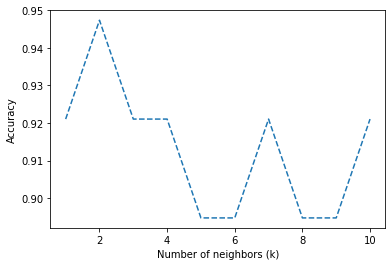

In [92]:
acc=[]
k=[]
for i in range(10):
  k.append(1+i)
  knnClass = KNeighborsClassifier(n_neighbors=1+i)
  knnClass.fit(X_train, y_train)
  y_pred = knnClass.predict(X_test)
  a_s=accuracy_score(y_test, y_pred)
  acc.append(a_s)
  
 
plt.plot(k, acc, '--',label='')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')


In [100]:
#best K-NN model: k=2
Knn_2= KNeighborsClassifier(n_neighbors=10)
knn_2.fit(X_train, y_train)
y_pred = knn_2.predict(X_test)
a_s2=accuracy_score(y_test, y_pred)
print(a_s2)


NameError: ignored